In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
names = pd.read_csv("presets_ver106.csv")

In [3]:
names

,pack,name,color,ver,0,45,1,2,3,4,...,44,67,68,58,46,47,48,49,69,70
0,JS Hip Hop Collection,Wah Wah Guitar,green,106,3,0,1,64,81,1,...,0,1,0,1,3,5,96,64,1,0
1,JS Hip Hop Collection,Old School Lead,yellow,106,1,0,4,89,63,1,...,0,0,0,1,2,1,71,0,0,0
2,JS Hip Hop Collection,Resonant Lead,yellow,106,1,0,2,64,64,1,...,0,0,0,1,5,1,64,64,0,0
3,JS Hip Hop Collection,Hip Hop Bass 1,blue,106,1,0,2,77,83,1,...,0,0,0,1,3,5,68,0,0,0
4,JS Hip Hop Collection,Whine Lead,yellow,106,2,78,2,64,81,1,...,0,0,0,1,5,1,64,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,Nolwenn Ann 1,Organ 4 stab,magenta,106,0,58,3,84,78,1,...,1,0,0,0,5,1,64,64,0,0
4933,Nolwenn Ann 1,Whistle,magenta,106,0,21,3,0,0,0,...,0,0,0,0,5,1,64,64,0,0
4934,Nolwenn Ann 1,DX7 Pretty Bell,magenta,106,0,82,2,87,64,1,...,24,0,0,0,5,1,64,64,0,0
4935,Nolwenn Ann 1,OldSkool Murk Bass,red,106,1,0,2,39,66,1,...,0,0,0,0,5,1,64,64,0,0


In [30]:
names.iloc[13]

pack     SOS-Synth1-NordLeadII-A-16
name                  TAKE CARE 001
color                       default
ver                             106
0                                 1
                    ...            
47                                1
48                               65
49                                3
69                                0
70                                0
Name: 13, Length: 78, dtype: object

In [4]:
df = names.drop(columns=["pack","name","color","ver"])

In [5]:
df_norm = 2*((df - df.min()) / (df.max() - df.min()))-1

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_norm)

In [7]:
pca_final = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [8]:
import seaborn as sns

In [9]:
from matplotlib import pyplot

In [10]:
sns.set(rc={'figure.figsize':(12*2,8*2)})

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
d = pca_final[pca_final["pc1"]<-1]

In [13]:
#ax = sns.scatterplot(x="pc1",y="pc2",data=pca_final)

In [14]:
#clustering = DBSCAN(eps=0.5, min_samples=6).fit(pca_final)
#clustering.labels_

In [15]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=0).fit(d)

In [16]:
d["cluster"] = clustering.labels_

<ipython-input-16-cb8ff5e6dded>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["cluster"] = clustering.labels_


In [24]:
names

,pack,name,color,ver,0,45,1,2,3,4,...,44,67,68,58,46,47,48,49,69,70
0,JS Hip Hop Collection,Wah Wah Guitar,green,106,3,0,1,64,81,1,...,0,1,0,1,3,5,96,64,1,0
1,JS Hip Hop Collection,Old School Lead,yellow,106,1,0,4,89,63,1,...,0,0,0,1,2,1,71,0,0,0
2,JS Hip Hop Collection,Resonant Lead,yellow,106,1,0,2,64,64,1,...,0,0,0,1,5,1,64,64,0,0
3,JS Hip Hop Collection,Hip Hop Bass 1,blue,106,1,0,2,77,83,1,...,0,0,0,1,3,5,68,0,0,0
4,JS Hip Hop Collection,Whine Lead,yellow,106,2,78,2,64,81,1,...,0,0,0,1,5,1,64,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,Nolwenn Ann 1,Organ 4 stab,magenta,106,0,58,3,84,78,1,...,1,0,0,0,5,1,64,64,0,0
4933,Nolwenn Ann 1,Whistle,magenta,106,0,21,3,0,0,0,...,0,0,0,0,5,1,64,64,0,0
4934,Nolwenn Ann 1,DX7 Pretty Bell,magenta,106,0,82,2,87,64,1,...,24,0,0,0,5,1,64,64,0,0
4935,Nolwenn Ann 1,OldSkool Murk Bass,red,106,1,0,2,39,66,1,...,0,0,0,0,5,1,64,64,0,0


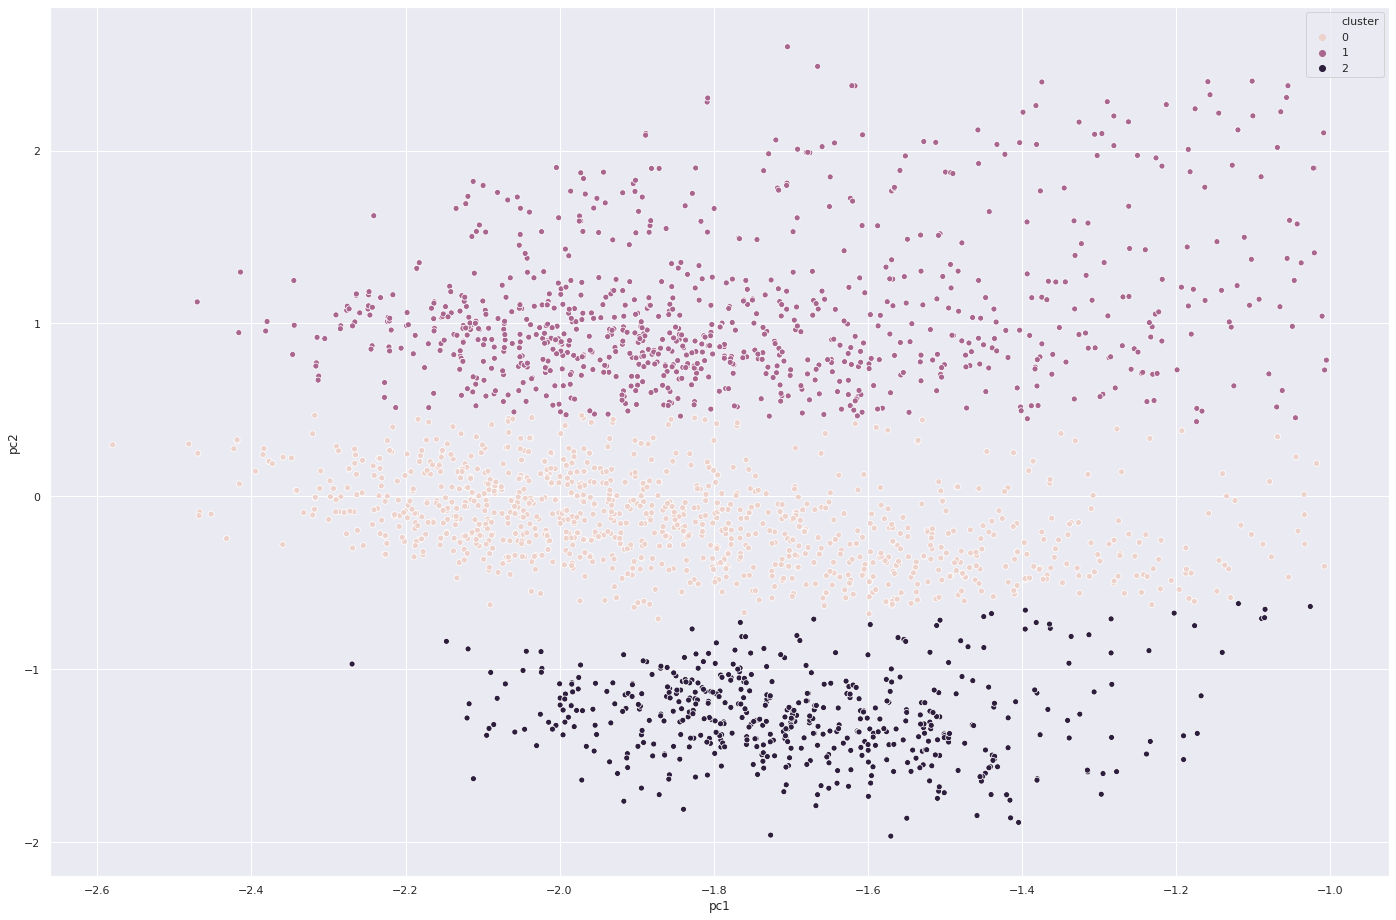

In [17]:
ax = sns.scatterplot(x="pc1",y="pc2",data=d, hue="cluster")

In [32]:
bruh = d.join(names)

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

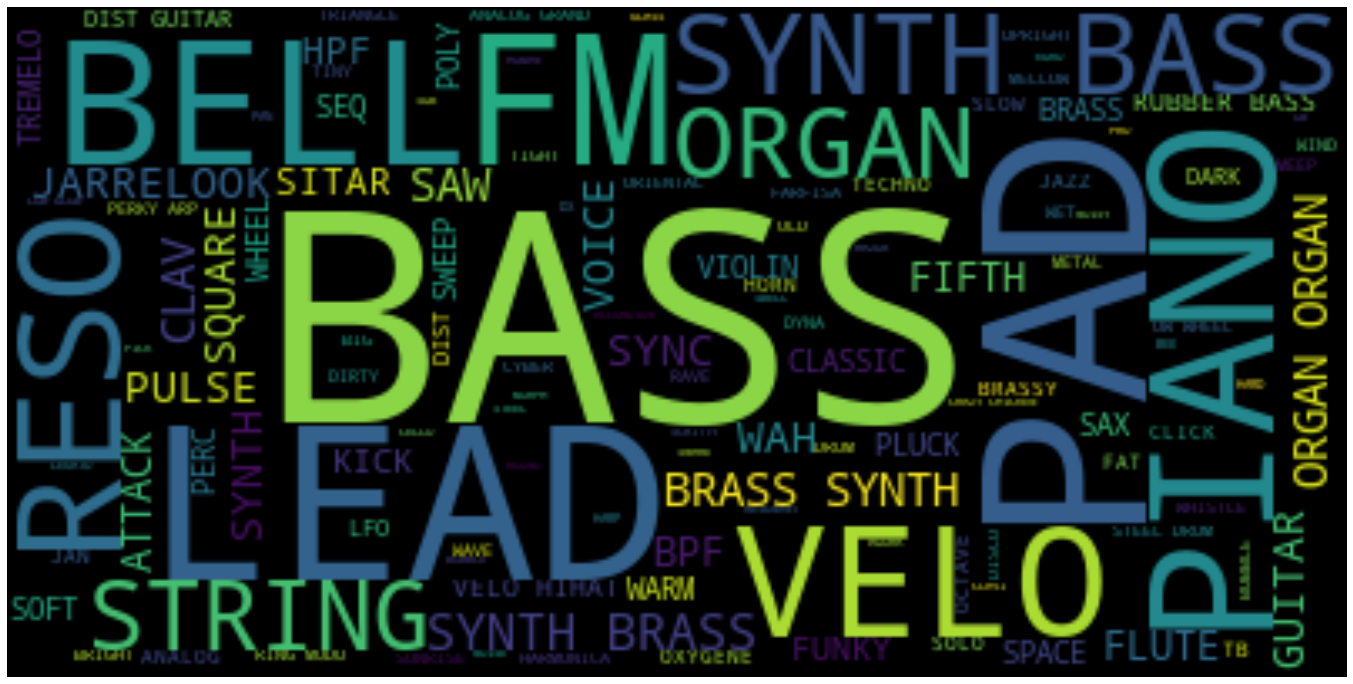

In [57]:
g = list(bruh[bruh["cluster"]==0].name)
s = ""
for x in g:
    s=s+" "+x

result = ''.join(i for i in s if not i.isdigit())
    
#print(result)
wordcloud = WordCloud().generate(result)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

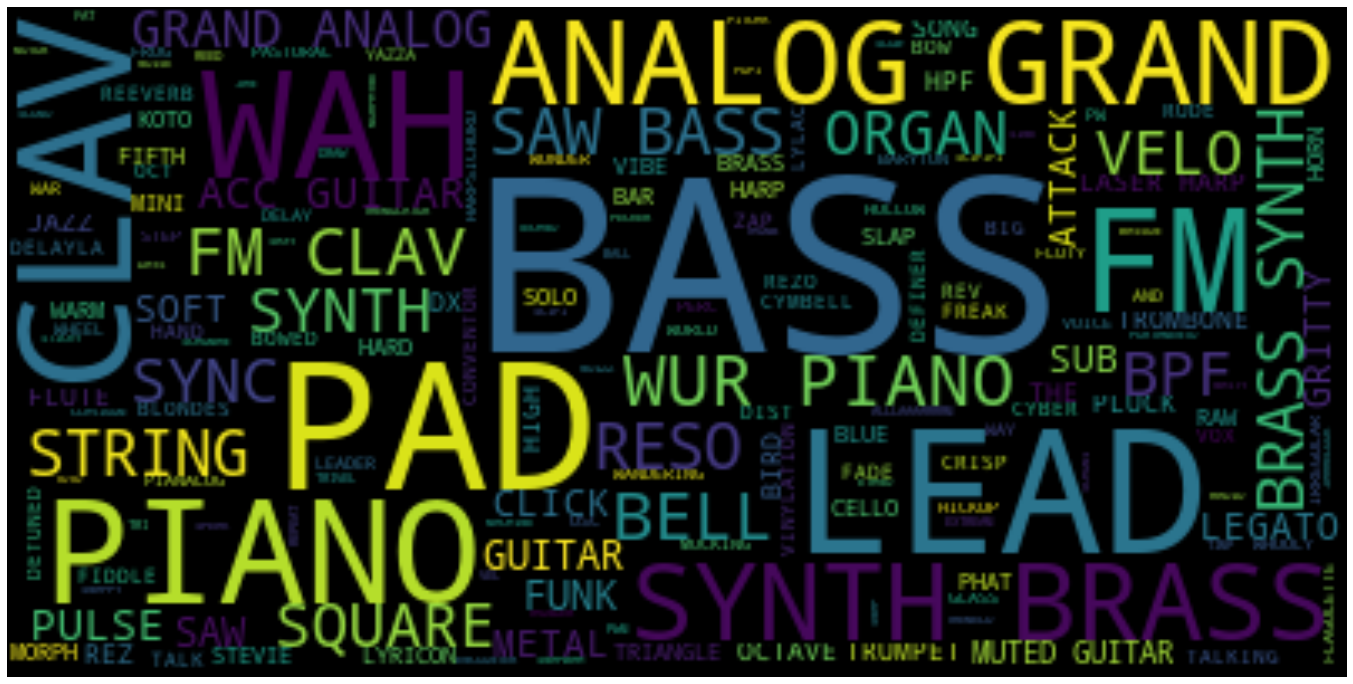

In [58]:
g = list(bruh[bruh["cluster"]==2].name)
s = ""
for x in g:
    s=s+" "+x

result = ''.join(i for i in s if not i.isdigit())
    
#print(result)
wordcloud = WordCloud().generate(result)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

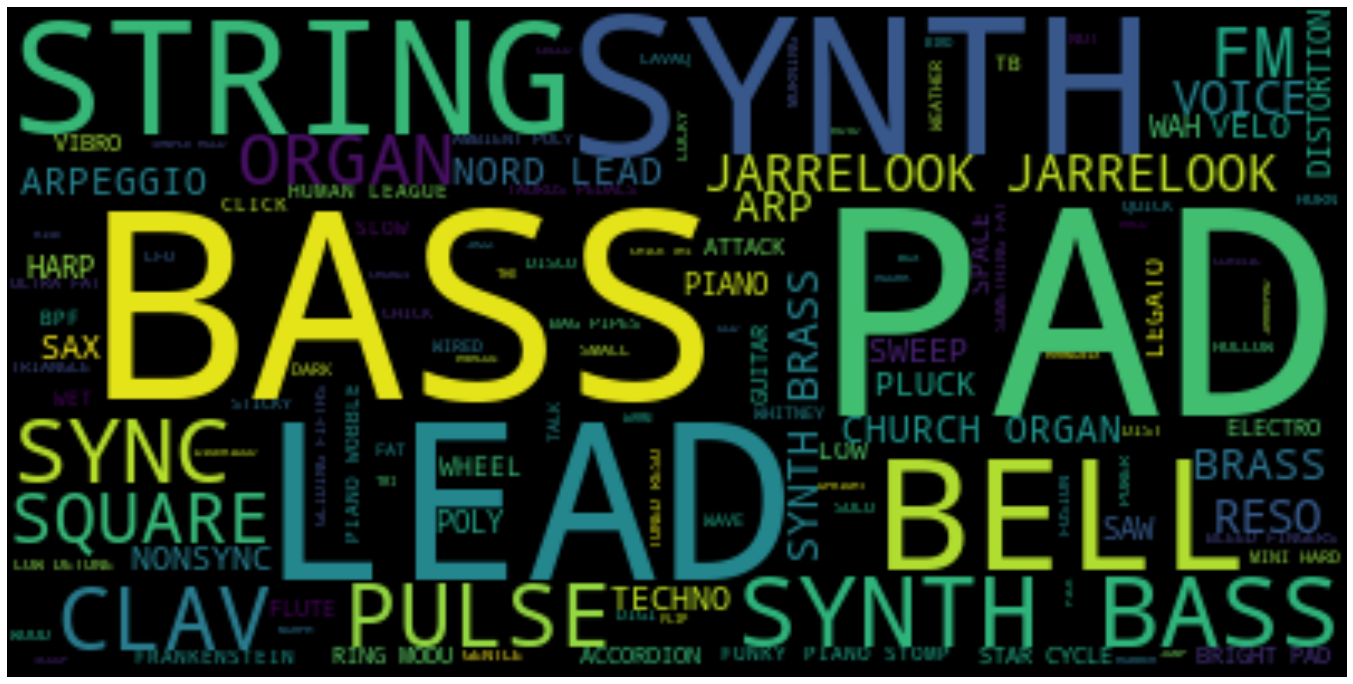

In [56]:
g = list(bruh[bruh["cluster"]==1].name)
s = ""
for x in g:
    s=s+" "+x

result = ''.join(i for i in s if not i.isdigit())
    
#print(result)
wordcloud = WordCloud().generate(result)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
finalDf = pd.concat([pca_final, names[['pack']]], axis = 1)

In [19]:
len(names['pack'])

4937

In [20]:
len(pca_final)

4937

In [21]:
finalDf

,pc1,pc2,pack
0,0.657224,-0.844774,JS Hip Hop Collection
1,0.854474,-2.504549,JS Hip Hop Collection
2,0.692427,-2.638580,JS Hip Hop Collection
3,0.198760,-1.449233,JS Hip Hop Collection
4,-0.040989,-2.145714,JS Hip Hop Collection
...,...,...,...
4932,1.145655,-1.570781,Nolwenn Ann 1
4933,1.843409,-0.451046,Nolwenn Ann 1
4934,1.387897,1.036613,Nolwenn Ann 1
4935,-0.375520,0.024436,Nolwenn Ann 1
